### Hamed Ajorlou 97101167

### Problem 1


### We'd Like to form the objective function 
As we've discussed in the lectures , the area formula is not convex , so we use log of the non convex objective function and though change the constraints .
using change of variable : l = exp.l1 & w = exp.w1

In [ ]:
import cvxpy as cp
import numpy as np
l1 = cp.Variable()
w1 = cp.Variable()
constraints = [w1 - np.log(10)>=0,
               w1- np.log(20) <= 0,
               l1 - np.log(20) >= 0,
               l1-np.log(30) <= 0,
               w1+l1 >= np.log(300),
               w1 - l1 + np.log(2)>=0,
               l1 - w1 >= 0]
obj = cp.Minimize(2*w1+2*l1)
prob = cp.Problem(obj, constraints)
prob.solve() 
print("Status:", prob.status)
print("Optimal l =", np.exp(l1.value), "cm")
print("Optimal w =", np.exp(w1.value), "cm")

Status: optimal
Optimal l = 21.547758034532006 cm
Optimal w = 13.922562131760698 cm


### Problem 2

first of all , we import the corresponding data file .
and then using toeplitz matrix , i constructed the constraint matrix and solved the problem .

In [ ]:
import numpy as np
n = 4
m = 300
sigma = 1.000000e-01
alpha = 0.040
beta = 1.000

A =np.array([[-2.054 , 1.393 , -2.644 , -0.979] ,
    [-0.321 , 1.622 , -0.773 , -2.534] ,
    [-0.645 , 0.221 , -1.954 , -1.614] ,
    [0.036 , -0.236 , -0.598 , -3.029] ,
    [-1.217 , 1.536 , -0.870 , -0.893] ,
    [-1.874 , -0.909 , -1.701 , -1.189] ,
    [-0.783 , 1.002 , 0.165 , -2.557] ,
    [-0.523 , 1.578 , -1.110 , -0.801] ,
    [-0.990 , -0.209 , -1.723 , -0.911] ,
    [-0.519 , 0.180 , -1.819 , -0.744] ,
    [-1.146 , 1.184 , 0.443 , -2.237] ,
    [-0.832 , 0.009 , -0.816 , -1.619] ,
    [0.799 , 2.373 , -1.023 , -0.871] ,
    [-1.381 , 0.367 , 0.294 , -2.178] ,
    [-0.182 , 0.766 , -0.686 , -1.298] ,
    [-2.005 , 0.248 , -2.123 , 0.730] ,
    [-0.275 , -1.489 , -0.901 , -2.334] ,
    [-0.368 , 0.944 , -0.975 , -0.767] ,
    [0.212 , 0.702 , -0.711 , -1.414] ,
    [-1.213 , 0.391 , -1.228 , -0.378] ,
    [-0.947 , 0.672 , -0.243 , -1.227] ,
    [-1.234 , 1.254 , 0.959 , -2.089] ,
    [-0.157 , -0.591 , -2.248 , -0.223] ,
    [0.462 , 1.738 , -0.733 , -0.849] ,
    [-1.664 , 0.028 , 0.172 , -1.388] ,
    [-1.018 , 0.083 , -1.372 , -0.252] ,
    [-0.211 , -0.279 , -2.025 , -0.206] ,
    [-0.992 , -0.267 , -1.132 , -0.522] ,
    [1.237 , 0.626 , 0.152 , -2.379] ,
    [-1.475 , -0.214 , 0.702 , -2.105] ,
    [0.668 , 0.227 , -1.025 , -1.150] ,
    [-0.340 , 0.103 , -1.490 , -0.266] ,
    [-0.742 , 1.107 , -0.680 , -0.291] ,
    [0.986 , 1.373 , 0.287 , -2.065] ,
    [-0.390 , -0.815 , -1.443 , -0.491] ,
    [0.708 , 0.140 , -0.293 , -1.779] ,
    [-1.604 , -0.655 , -0.511 , -0.853] ,
    [-0.904 , 0.139 , 0.235 , -1.550] ,
    [-0.922 , -0.175 , -0.131 , -1.248] ,
    [-1.271 , -0.277 , 0.554 , -1.816] ,
    [1.553 , 1.537 , -1.130 , -0.735] ,
    [-1.202 , 0.473 , 0.102 , -0.748] ,
    [-0.704 , -0.293 , -0.288 , -1.057] ,
    [0.569 , -1.003 , -0.608 , -1.758] ,
    [0.712 , 0.327 , -0.685 , -1.078] ,
    [0.010 , 0.500 , 0.339 , -1.664] ,
    [-1.201 , -0.168 , -0.944 , -0.128] ,
    [-0.712 , -1.391 , -2.277 , 0.285] ,
    [-1.292 , 1.870 , 0.053 , 0.291] ,
    [0.816 , 1.310 , -0.527 , -0.701] ,
    [-0.644 , 0.041 , -0.953 , 0.070] ,
    [0.690 , 0.636 , 0.075 , -1.590] ,
    [0.569 , 1.736 , -0.316 , -0.314] ,
    [-0.116 , -1.108 , -1.729 , -0.080] ,
    [-0.011 , 0.330 , 0.339 , -1.333] ,
    [-0.073 , -1.209 , 0.162 , -1.910] ,
    [0.175 , 0.314 , -1.288 , 0.207] ,
    [0.238 , -0.488 , -1.170 , -0.384] ,
    [0.806 , -1.374 , -0.909 , -1.504] ,
    [-1.357 , -0.203 , -1.341 , 0.589] ,
    [0.428 , -0.413 , -1.034 , -0.775] ,
    [0.529 , -0.500 , -1.603 , -0.278] ,
    [-0.645 , 0.065 , 0.620 , -1.643] ,
    [-0.133 , 0.559 , 0.588 , -1.358] ,
    [-0.005 , -1.499 , -1.713 , -0.191] ,
    [-0.038 , -0.716 , 0.202 , -1.615] ,
    [0.327 , -0.542 , -1.573 , 0.176] ,
    [1.479 , -1.345 , -2.064 , -0.398] ,
    [1.138 , 1.482 , 0.111 , -1.161] ,
    [1.213 , -0.605 , -1.665 , -0.144] ,
    [0.315 , -0.572 , 0.128 , -1.556] ,
    [1.082 , -1.228 , -1.726 , -0.301] ,
    [0.990 , 0.667 , -0.926 , -0.266] ,
    [-0.258 , 0.290 , -0.222 , -0.642] ,
    [-1.008 , 1.862 , 1.065 , -0.458] ,
    [-0.560 , -1.707 , -0.860 , -0.737] ,
    [-1.441 , -1.751 , -0.159 , -1.013] ,
    [-0.048 , 1.084 , -0.502 , 0.228] ,
    [-0.601 , 0.612 , -0.692 , 0.120] ,
    [-0.187 , 0.107 , -0.953 , 0.221] ,
    [-0.461 , -2.306 , 0.362 , -2.238] ,
    [0.021 , 0.825 , -0.072 , -0.553] ,
    [0.290 , 0.376 , -0.600 , -0.359] ,
    [0.728 , 0.058 , 0.020 , -1.268] ,
    [0.714 , -0.721 , -0.937 , -0.737] ,
    [-1.128 , -1.917 , -0.511 , -0.746] ,
    [-0.805 , -0.330 , -0.037 , -0.683] ,
    [-0.256 , 1.937 , 0.978 , -0.602] ,
    [-0.631 , 0.092 , -0.337 , -0.346] ,
    [-1.232 , -0.461 , -0.107 , -0.408] ,
    [-0.001 , 0.599 , 0.290 , -0.724] ,
    [0.219 , -1.393 , -0.112 , -1.567] ,
    [0.726 , 1.848 , 0.778 , -1.006] ,
    [-1.319 , 0.020 , -0.275 , 0.003] ,
    [-0.696 , 0.679 , 1.107 , -1.404] ,
    [-2.171 , -0.957 , 0.485 , -0.598] ,
    [-1.594 , 0.622 , 0.105 , 0.380] ,
    [0.380 , -0.756 , 0.234 , -1.500] ,
    [1.278 , 0.926 , -0.090 , -0.924] ,
    [-1.140 , -0.221 , 0.314 , -0.417] ,
    [-0.402 , 0.892 , -0.150 , -0.073] ,
    [-0.580 , 0.313 , -1.356 , 1.048] ,
    [0.944 , 1.751 , 0.399 , -0.720] ,
    [1.064 , -0.026 , -0.417 , -0.801] ,
    [-0.351 , -0.447 , -0.239 , -0.426] ,
    [-0.234 , -0.199 , -0.231 , -0.361] ,
    [1.189 , 0.536 , -1.074 , -0.002] ,
    [1.472 , 0.625 , -0.522 , -0.533] ,
    [-0.588 , -0.275 , -0.006 , -0.453] ,
    [0.587 , 1.259 , 0.406 , -0.535] ,
    [-1.107 , 0.932 , 0.700 , -0.299] ,
    [-2.202 , 0.279 , -0.832 , 1.599] ,
    [1.276 , 0.553 , -1.610 , 0.700] ,
    [-0.318 , -0.688 , 0.039 , -0.665] ,
    [-0.131 , -0.670 , 0.813 , -1.589] ,
    [-0.059 , 1.293 , 0.599 , -0.482] ,
    [-0.808 , 0.795 , 0.965 , -0.727] ,
    [-1.186 , 0.856 , 0.923 , -0.302] ,
    [-0.400 , 0.811 , -0.195 , 0.442] ,
    [-0.635 , 0.393 , 0.139 , -0.126] ,
    [0.262 , -1.301 , -0.803 , -0.395] ,
    [-0.079 , 0.229 , 0.411 , -0.703] ,
    [-2.325 , -0.808 , 0.971 , -0.611] ,
    [1.415 , 0.379 , 0.179 , -1.133] ,
    [0.578 , 0.081 , 0.432 , -1.052] ,
    [-0.548 , -0.249 , 0.289 , -0.650] ,
    [0.444 , 0.228 , -0.752 , 0.214] ,
    [-0.429 , 0.585 , -0.990 , 1.356] ,
    [-1.188 , -0.072 , -0.373 , 0.716] ,
    [-1.175 , 0.240 , 0.228 , 0.078] ,
    [-0.249 , 0.147 , 0.662 , -0.664] ,
    [0.129 , 1.381 , 0.533 , -0.151] ,
    [0.174 , 1.578 , -0.505 , 0.939] ,
    [0.953 , 0.639 , -0.830 , 0.321] ,
    [-1.056 , -0.048 , 0.369 , 0.110] ,
    [0.620 , -1.693 , -1.467 , 0.129] ,
    [0.371 , -0.224 , 0.687 , -1.372] ,
    [0.397 , -0.101 , -0.581 , 0.198] ,
    [-0.113 , -0.375 , -0.475 , 0.227] ,
    [0.591 , 0.808 , -0.382 , 0.327] ,
    [-0.347 , -1.158 , -0.064 , -0.443] ,
    [0.535 , -0.359 , 0.419 , -1.009] ,
    [-1.116 , -0.065 , 0.343 , 0.218] ,
    [1.340 , 0.756 , 1.263 , -1.631] ,
    [-1.119 , 0.149 , -0.179 , 0.860] ,
    [0.680 , -0.785 , 0.818 , -1.491] ,
    [-0.020 , 0.117 , -0.041 , 0.229] ,
    [-0.096 , -0.186 , -0.167 , 0.138] ,
    [-0.854 , -0.184 , -0.983 , 1.279] ,
    [0.623 , 1.082 , -0.089 , 0.494] ,
    [0.677 , -1.125 , 0.030 , -0.798] ,
    [-0.950 , 0.686 , 1.230 , -0.401] ,
    [-0.606 , -0.146 , 0.384 , -0.050] ,
    [-0.374 , -0.508 , 0.173 , -0.190] ,
    [0.327 , -0.656 , 0.763 , -1.229] ,
    [-0.136 , 1.509 , 1.364 , -0.462] ,
    [-0.704 , -0.888 , 0.062 , -0.142] ,
    [-1.056 , 0.269 , -0.179 , 0.957] ,
    [-1.021 , -0.351 , -1.430 , 1.958] ,
    [-0.684 , 0.033 , 1.488 , -1.110] ,
    [-0.847 , -2.379 , 0.508 , -1.044] ,
    [-0.465 , -2.424 , -0.607 , -0.258] ,
    [-0.546 , -0.964 , 0.755 , -0.908] ,
    [0.071 , -0.517 , 0.883 , -1.091] ,
    [-0.692 , -0.020 , 1.682 , -1.384] ,
    [0.000 , -0.981 , 0.723 , -1.008] ,
    [0.294 , 0.837 , 2.094 , -1.647] ,
    [-1.168 , -0.909 , -1.052 , 1.344] ,
    [-0.013 , -1.258 , 0.806 , -1.335] ,
    [-0.262 , 1.789 , -0.037 , 1.293] ,
    [0.889 , 1.216 , 0.589 , -0.283] ,
    [-1.009 , -0.089 , 1.235 , -0.418] ,
    [-1.336 , -0.722 , 0.080 , 0.429] ,
    [-0.628 , -0.075 , 0.021 , 0.541] ,
    [-0.264 , -2.635 , 0.888 , -1.795] ,
    [-0.493 , -0.077 , 0.285 , 0.294] ,
    [1.018 , -0.661 , -0.008 , -0.587] ,
    [0.011 , -1.535 , -1.084 , 0.582] ,
    [0.896 , -0.506 , -0.764 , 0.271] ,
    [-0.377 , 1.635 , 0.018 , 1.259] ,
    [-0.245 , -1.111 , -0.615 , 0.309] ,
    [-1.011 , 0.441 , -0.086 , 0.983] ,
    [-2.365 , -1.263 , 0.037 , 0.870] ,
    [-0.038 , 0.327 , -0.998 , 1.495] ,
    [-0.079 , -0.384 , 0.775 , -0.517] ,
    [0.118 , 0.307 , -0.114 , 0.554] ,
    [0.505 , -0.454 , -0.896 , 0.581] ,
    [-0.020 , -2.009 , -0.579 , -0.021] ,
    [1.444 , -0.978 , -0.799 , -0.207] ,
    [0.571 , 0.697 , 0.871 , -0.347] ,
    [0.008 , 0.555 , 0.245 , 0.659] ,
    [-0.078 , 0.997 , 0.205 , 0.887] ,
    [-0.941 , 0.580 , 1.317 , -0.049] ,
    [0.317 , -0.559 , 0.284 , -0.192] ,
    [-1.664 , -1.294 , -0.415 , 1.108] ,
    [-0.541 , -0.072 , 0.199 , 0.559] ,
    [-2.120 , 0.753 , 1.116 , 0.758] ,
    [0.316 , -0.586 , -0.140 , 0.237] ,
    [-0.844 , -0.767 , 0.174 , 0.665] ,
    [0.379 , -0.471 , 0.069 , 0.208] ,
    [-0.120 , -0.117 , -0.013 , 0.613] ,
    [0.040 , -1.081 , -0.444 , 0.626] ,
    [-1.518 , 0.751 , 0.721 , 1.052] ,
    [1.038 , -1.126 , -1.634 , 1.348] ,
    [0.103 , -0.331 , 0.385 , -0.008] ,
    [0.913 , -0.336 , -0.851 , 1.009] ,
    [-0.595 , -0.705 , 0.812 , -0.374] ,
    [1.535 , -0.959 , -1.307 , 0.563] ,
    [2.136 , 2.690 , 0.121 , 0.863] ,
    [1.227 , 0.863 , 0.291 , 0.236] ,
    [-0.041 , 0.434 , 0.808 , 0.279] ,
    [0.125 , -0.139 , 1.384 , -0.694] ,
    [0.056 , 0.541 , 0.812 , 0.214] ,
    [-1.347 , 0.745 , 0.500 , 1.164] ,
    [0.469 , -0.890 , -0.511 , 0.659] ,
    [-0.261 , 1.274 , 0.848 , 0.574] ,
    [0.288 , -1.163 , -0.758 , 0.834] ,
    [0.086 , -0.146 , 0.900 , -0.339] ,
    [-1.100 , -0.662 , -1.073 , 2.080] ,
    [-0.246 , -0.838 , 0.132 , 0.374] ,
    [0.669 , -0.149 , -1.188 , 1.729] ,
    [1.056 , -1.406 , 1.013 , -1.416] ,
    [-0.266 , -1.054 , 0.217 , 0.327] ,
    [0.133 , 0.652 , 0.285 , 1.008] ,
    [-1.029 , -0.876 , 0.849 , 0.198] ,
    [0.232 , -0.839 , -0.006 , 0.574] ,
    [0.498 , -0.107 , 0.882 , -0.275] ,
    [0.219 , -0.036 , 0.339 , 0.655] ,
    [0.500 , -0.753 , -0.146 , 0.463] ,
    [0.656 , 1.320 , 1.033 , 0.316] ,
    [-1.666 , 0.135 , 1.552 , 0.565] ,
    [-1.334 , -2.415 , 0.258 , 0.478] ,
    [0.056 , -1.047 , 1.432 , -0.901] ,
    [0.257 , -1.081 , 0.249 , 0.346] ,
    [-1.257 , -0.328 , 1.322 , 0.366] ,
    [-1.410 , -1.423 , 0.572 , 0.660] ,
    [0.941 , 0.229 , 0.938 , 0.080] ,
    [1.521 , 2.237 , 0.332 , 1.233] ,
    [1.190 , -0.734 , 0.529 , -0.174] ,
    [-0.276 , -0.050 , 1.537 , -0.079] ,
    [1.488 , -0.977 , 0.182 , -0.023] ,
    [1.067 , -1.681 , -0.787 , 0.799] ,
    [-1.349 , 0.470 , 0.744 , 1.603] ,
    [2.112 , -0.425 , 1.064 , -0.895] ,
    [1.863 , 0.083 , 1.110 , -0.797] ,
    [0.485 , -0.570 , 0.760 , 0.256] ,
    [-0.331 , -0.783 , -0.027 , 1.315] ,
    [0.114 , -1.945 , 0.482 , 0.033] ,
    [0.931 , -0.406 , -0.160 , 0.885] ,
    [0.858 , 0.279 , 0.594 , 0.460] ,
    [-1.580 , 0.249 , 0.858 , 1.574] ,
    [0.663 , 0.257 , 0.280 , 0.902] ,
    [1.254 , 1.058 , 0.790 , 0.629] ,
    [1.270 , 0.719 , 1.395 , 0.017] ,
    [1.770 , 0.247 , -0.300 , 1.294] ,
    [1.290 , -0.673 , -0.268 , 1.002] ,
    [0.485 , -0.501 , -0.895 , 2.266] ,
    [0.614 , 1.281 , 0.325 , 1.762] ,
    [-0.433 , -0.896 , 1.142 , 0.441] ,
    [0.059 , -0.574 , 0.752 , 0.897] ,
    [0.508 , -0.498 , -0.335 , 1.427] ,
    [1.957 , -1.863 , -0.583 , 0.448] ,
    [0.525 , 0.912 , 2.495 , -0.365] ,
    [-0.150 , 0.508 , 0.110 , 2.238] ,
    [0.261 , -0.150 , 1.165 , 0.623] ,
    [1.095 , 1.339 , 1.541 , 0.558] ,
    [1.692 , -1.119 , -0.322 , 0.912] ,
    [0.234 , 1.634 , 2.016 , 0.528] ,
    [0.781 , -0.637 , 1.151 , 0.065] ,
    [0.056 , -1.008 , 0.685 , 1.050] ,
    [0.088 , 0.388 , 0.672 , 1.324] ,
    [2.183 , 2.213 , 0.524 , 1.399] ,
    [0.390 , 1.341 , 1.442 , 1.094] ,
    [2.309 , -0.543 , -0.264 , 1.035] ,
    [1.624 , -0.201 , 0.636 , 0.565] ,
    [-1.004 , 0.231 , 2.629 , 0.298] ,
    [-0.822 , -0.186 , 0.806 , 1.687] ,
    [-0.065 , 0.168 , 0.354 , 1.957] ,
    [-0.296 , -1.256 , 0.818 , 0.858] ,
    [-1.025 , 0.055 , 1.232 , 1.584] ,
    [1.593 , -0.377 , 0.826 , 0.158] ,
    [0.281 , -0.987 , 0.457 , 1.113] ,
    [-0.682 , -0.528 , 1.306 , 1.228] ,
    [0.326 , -1.436 , 1.134 , 0.315] ,
    [0.551 , -1.324 , 0.680 , 0.651] ,
    [-0.204 , -0.144 , 0.771 , 1.582] ,
    [0.480 , -0.314 , 1.448 , 0.439] ,
    [-0.012 , -0.172 , 0.856 , 1.342] ,
    [1.073 , -0.694 , 2.081 , -0.679] ,
    [1.865 , -0.652 , 0.249 , 0.857] ,
    [-1.023 , -1.513 , 0.480 , 1.843] ,
    [1.191 , -0.015 , 0.911 , 1.098] ,
    [0.243 , -0.265 , 0.964 , 1.469] ,
    [1.191 , -2.449 , 0.249 , 0.709] ,
    [-0.435 , -0.421 , 2.732 , -0.160] ,
    [0.289 , -2.520 , -1.655 , 2.950] ,
    [0.731 , 1.620 , 2.176 , 1.535] ,
    [0.635 , -1.444 , 0.758 , 1.684] ,
    [0.553 , -2.078 , 1.191 , 0.908] ,
    [-0.251 , 0.044 , 1.216 , 3.203]])
y = np.array([-2.177 , -2.123 , -2.102 , -2.026 , -2.002 , -2.001 , -2.000 , -1.963 , -1.943 , -1.919 , -1.908 , -1.894 , -1.866 , -1.844 , -1.819 , -1.806 , -1.784 , -1.778 , -1.766 , -1.747 , -1.731 , -1.730 , -1.722 , -1.715 , -1.647 , -1.636 , -1.627 , -1.605 , -1.598 , -1.598 , -1.589 , -1.580 , -1.563 , -1.536 , -1.531 , -1.506 , -1.500 , -1.497 , -1.462 , -1.459 , -1.427 , -1.399 , -1.384 , -1.370 , -1.365 , -1.322 , -1.314 , -1.303 , -1.291 , -1.258 , -1.256 , -1.253 , -1.208 , -1.191 , -1.175 , -1.162 , -1.156 , -1.152 , -1.140 , -1.121 , -1.121 , -1.112 , -1.106 , -1.066 , -1.063 , -1.061 , -1.054 , -1.027 , -1.008 , -0.983 , -0.971 , -0.960 , -0.957 , -0.943 , -0.939 , -0.923 , -0.922 , -0.913 , -0.909 , -0.909 , -0.907 , -0.906 , -0.897 , -0.891 , -0.887 , -0.876 , -0.867 , -0.864 , -0.860 , -0.844 , -0.843 , -0.832 , -0.799 , -0.784 , -0.779 , -0.742 , -0.731 , -0.725 , -0.714 , -0.700 , -0.691 , -0.660 , -0.657 , -0.625 , -0.621 , -0.596 , -0.587 , -0.583 , -0.580 , -0.561 , -0.557 , -0.524 , -0.523 , -0.520 , -0.507 , -0.480 , -0.478 , -0.469 , -0.456 , -0.444 , -0.419 , -0.403 , -0.371 , -0.363 , -0.351 , -0.335 , -0.323 , -0.307 , -0.290 , -0.241 , -0.207 , -0.170 , -0.163 , -0.158 , -0.149 , -0.146 , -0.146 , -0.125 , -0.124 , -0.121 , -0.096 , -0.081 , -0.043 , -0.041 , -0.026 , -0.023 , 0.002 , 0.006 , 0.033 , 0.033 , 0.039 , 0.054 , 0.071 , 0.071 , 0.090 , 0.091 , 0.104 , 0.105 , 0.115 , 0.117 , 0.118 , 0.119 , 0.121 , 0.126 , 0.130 , 0.138 , 0.146 , 0.148 , 0.150 , 0.150 , 0.150 , 0.168 , 0.185 , 0.190 , 0.194 , 0.236 , 0.242 , 0.243 , 0.250 , 0.263 , 0.268 , 0.279 , 0.296 , 0.314 , 0.317 , 0.345 , 0.366 , 0.381 , 0.389 , 0.399 , 0.417 , 0.505 , 0.513 , 0.514 , 0.527 , 0.537 , 0.555 , 0.582 , 0.585 , 0.627 , 0.640 , 0.646 , 0.651 , 0.664 , 0.675 , 0.679 , 0.684 , 0.688 , 0.704 , 0.706 , 0.719 , 0.720 , 0.729 , 0.735 , 0.747 , 0.757 , 0.766 , 0.772 , 0.777 , 0.786 , 0.821 , 0.826 , 0.831 , 0.910 , 0.911 , 0.977 , 0.991 , 0.995 , 0.999 , 1.017 , 1.032 , 1.047 , 1.085 , 1.160 , 1.168 , 1.170 , 1.181 , 1.196 , 1.230 , 1.245 , 1.251 , 1.265 , 1.277 , 1.278 , 1.281 , 1.283 , 1.295 , 1.309 , 1.322 , 1.335 , 1.336 , 1.342 , 1.363 , 1.393 , 1.398 , 1.418 , 1.462 , 1.490 , 1.492 , 1.513 , 1.527 , 1.529 , 1.531 , 1.533 , 1.568 , 1.573 , 1.581 , 1.604 , 1.618 , 1.627 , 1.631 , 1.637 , 1.662 , 1.663 , 1.664 , 1.664 , 1.678 , 1.678 , 1.693 , 1.701 , 1.703 , 1.706 , 1.709 , 1.718 , 1.726 , 1.737 , 1.743 , 1.750 , 1.756 , 1.771 , 1.804 , 1.816 , 1.820 , 1.830 , 1.835 , 1.886 , 1.988 , 2.045 , 2.053 , 2.115])
cs=A.shape
y.shape

(300,)

In [ ]:
from scipy.linalg import toeplitz
import numpy as np
import cvxpy as cp
import numpy as np
from numpy import linalg as LA
x = cp.Variable(cs[1])
z = cp.Variable(cs[0])
L=len(y)
a = np.zeros(L)
a[0]=-1
a[1]=1
b=np.zeros(L-1)
b[0]=-1
c = toeplitz(b,a)
c.shape
z1=c*y
su=np.array([sum(i) for i in z1])
constraints = [su<=c*z,c*z<=25*su]
obj = cp.Minimize(cp.norm(z-A*x))
prob = cp.Problem(obj,constraints)
prob.solve() 
print("Obj Minimum =", prob.value)
print("Optimal x =", x.value)

Obj Minimum = 1.4635789384838416
Optimal x = [ 0.48194427 -0.46569465  0.9364119   0.92966369]


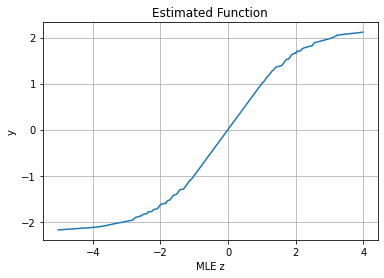

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(z.value, y)

## Estimated function 
plt.title("Estimated Function")
plt.xlabel("MLE z")
plt.ylabel("y")
plt.grid()

### Problem 3

In [ ]:
import numpy as np
import cvxpy as cp
m = 70
k = 58
n = 12
A = np.array([[ 1.8, 0.4, 1. , 2.2, 1.9,-1. , 1. ,-0.2,-0.1, 0.4, 0.1, 1.5],
 [ 0.8, 0.1, 0.4, 0.3, 1.5,-0.2, 0.3,-0.9,-2.6, 0.7, 0.9,-0.7],
 [ 2.3,-1.5, 0. ,-0.2, 1.5, 1.5, 0.2, 0.4,-0.9,-2. ,-0.3, 0.2],
 [ 1.2, 1.2,-0.4,-0.3,-1. ,-1.4,-1.7, 2. ,-0.5,-0.4,-1.3, 0.8],
 [-1.6,-0.2,-0.9, 0.4,-0.5,-1.2,-0. , 0.4, 0.1, 0.3,-0.6,-0.4],
 [-0.7,-0.4,-0.8,-1.7, 0.2,-0.4,-1.6, 0.5,-0.9, 0.1, 0.7, 0.1],
 [ 1.1,-1.2, 0.4,-0.7,-0.9,-0.6,-0.3, 0.1,-1.2, 0.9, 0.5,-1.5],
 [ 1.5, 1.9, 1.2,-0.2,-1.1, 1.1,-0.4, 1.2, 0.2, 1. , 0.4, 0.7],
 [ 0. , 1.8, 0.1, 0.4, 1.9,-1.3,-1.3, 1. ,-1.2, 1.9,-0.4,-0.7],
 [ 1.9, 1.5, 1.9, 0.9,-0.9, 1.9,-0.3, 0.8, 0.9,-0.2, 0.6, 0.9],
 [ 0.4,-1.1, 0.3, 1.3,-0.7,-0.1,-0.4, 1.8, 0.7, 0.4,-0.8, 0.5],
 [-0.7, 0. ,-0.6, 0.7, 0.6,-0.2, 0.4,-1.1,-1.5, 0.4, 0.2, 0.6],
 [ 2.4, 0.9,-0.9, 1.1,-1.3,-0.5,-0.1, 1.7,-0.7,-0.8,-0.1,-0.7],
 [ 1.1,-1.1,-1.1,-0.4,-0.5, 1.9, 0.9, 0.1,-1.2, 0.8,-1. ,-1.5],
 [ 1.2, 0.3, 0.9, 0.3, 0.9,-0.7,-1. , 0.7,-0.8,-0.7,-0.5, 0. ],
 [-0.4,-1.4,-0.6,-2.2, 0.6,-1.6,-1.1, 0.1,-0.7, 1.5,-1.3, 0.3],
 [-0. ,-1.2, 0.5,-0.2, 0.8, 0.8, 2.2, 1.3,-0.4,-0.2, 1.1, 0.7],
 [ 0.6,-1.6,-0. ,-0.7, 0.3,-0.1, 0.9, 0.3, 0.8,-0.5,-0.9,-0.4],
 [-0. , 0.4, 2.3,-0. ,-1. ,-0.3,-0.5, 0.5,-1.5, 0.1, 0.2, 0.2],
 [-0.6,-0.2,-1.4,-0.5,-0.5, 0.4,-1.2, 0.8, 1.5,-2.1, 0.4, 0.7],
 [-0.6,-0.4,-0.1,-0.3,-0.3,-1.7, 1.2, 1.1,-0.8,-1.5, 0.5,-0.6],
 [ 0.1,-0.3, 0.7, 0.7,-0.7,-1.4,-1.6, 0.6,-1.2,-0.5,-0.6,-0.1],
 [-1.9, 0.2, 0.5, 0.1,-0.3, 0.1, 0.4,-2.8, 2. , 0.4,-0.7,-0.4],
 [ 0.5,-0.1,-2. , 2.1,-0.1, 1. ,-0.7, 1.5, 0.3, 0.6,-1. , 1.2],
 [ 0.7, 1.3,-0.6,-0.5, 2.3,-1.1,-0.1, 1.1, 0.1, 0.6,-0.4, 0.4],
 [-1.3, 1.7,-0.1,-0.7, 0.7,-0.5,-1.3,-1.3, 0.7,-0.2,-0.1, 1.1],
 [-1.1,-0.7,-0.4, 0.1,-0. ,-0.3,-0.1,-0.1,-0.7,-0.8, 0.3,-0.9],
 [-1.2,-0.3,-0.2, 2.3,-0.7, 0.9, 0.7,-1.2, 0.8,-1.2,-2.7, 0.6],
 [-1.8, 0.5,-0.7, 1.7, 1.1,-0.5,-0.7,-1.2,-0.4,-0.3,-0.4, 0.2],
 [ 0.6, 0.3,-0.8,-1.4, 1.4,-0.7,-0.7,-0.5,-1.8,-0.5,-0.5, 0.6],
 [ 0.7, 0. , 0.9, 0.3,-0. , 0.2,-0.2,-0.4,-0.3,-1.1, 0.3,-1. ],
 [ 0.8,-0.2, 0. , 0.5, 0.6,-1.6,-0.2, 0.9,-1.7, 0.4,-2.3,-1. ],
 [ 0. ,-1.7,-1. ,-1.5, 1.6, 0.2, 0.6,-0.2,-0.4,-1.6,-0.3,-0.8],
 [ 0.9, 1.1, 1.5, 0.9,-0.6,-1.1, 0.8, 0.4,-1.8, 0.4, 0.8, 0.1],
 [-0.2,-0.8,-1.4, 0.8,-0.3,-0.2, 1.7, 0.7, 0.4, 0.1, 1.5, 1.7],
 [ 0.9, 0.6,-2.1, 0.1,-0.1, 0.1, 0.9,-2.7,-0.6, 0.3,-0.5,-1.4],
 [ 0.9, 0.3,-1. , 0.3, 0.8, 0. , 0.8, 0.1,-0.4,-1.2,-0.1, 0.2],
 [ 0.9,-0.1, 0.5,-1. ,-0.8,-0.1,-1.1, 0.8, 0.5, 0.3, 0.3, 2. ],
 [-0.5,-2.2, 0.2,-0.1,-0.5,-1. ,-0.4, 0.2,-0.5, 2.4,-1. ,-0.8],
 [-2.3, 0.3,-2. ,-0.5,-0.3,-0.7, 1.7, 1. , 1.3,-0.9, 1.1, 0.5],
 [ 0.8, 1. ,-0.9,-0.4, 0.9,-2.7, 1.5, 0.6,-0. , 0.2,-1. ,-0.3],
 [ 1.1, 1.3, 2.7,-0.1,-0.7,-0.5,-1. ,-0.1, 0.4,-0. , 1.1,-0.2],
 [-0.3,-0.6,-1.6,-1.6,-1.2, 1.3, 0.9, 1.4,-1.3,-2. ,-0.7, 0.2],
 [ 0.5, 1. , 0.3, 1.7,-0.2,-0.9,-1.7,-0.9, 0.2,-0.9, 0.9, 1.4],
 [-2.4, 0.9,-2.2, 0.4, 1.2, 0.1,-1.3,-0.6,-0.3,-0.2,-0.2,-0.1],
 [ 0.2,-1.2,-0.2, 1.5,-0.4,-0.4, 1.1,-2.6, 1.2,-0.6, 0.2, 0.1],
 [ 0.9,-0.3,-0.7, 1.3,-2.4, 0. ,-1.3,-0.8, 2. ,-0. , 0.2,-1.8],
 [-0.7, 0.2, 0.4, 0.6, 0. , 0.5, 0.5,-1.8, 0. , 0.8, 0.6,-0.4],
 [-0.8,-1.1,-0.1, 1.1,-2. ,-0.7,-1.1, 0.8,-0.6,-0.5,-0.2, 0.4],
 [-0.4,-3. , 0.5, 0.4,-0.2,-1.1, 0.4, 0.4,-0.5,-0.2,-0.9,-0.2],
 [-1.6, 0.4,-0.9, 0.2,-1.4,-0.6,-0.1,-1.7, 0.1,-0.4,-1.7,-1.3],
 [ 0.6, 0.9,-0.1, 0.4, 0.2, 0.3, 1.3,-1.5, 0.7,-0.4,-0.2,-0.3],
 [-0.4,-1.2, 0.2, 1.7,-0.1,-0. ,-0.7,-0.1, 0.5,-0.4,-0.5, 0.4],
 [-0.9, 0.3, 0.8, 1.4,-0.1, 1.4, 1. ,-1. ,-1.2,-0.3, 1. ,-0.1],
 [-0.6, 1.6, 0.3,-2.3, 0.3, 0.5, 0.2, 0.4,-0.1,-1.3,-0.4,-0.9],
 [-0.9,-1.3, 0.5, 0.1,-0.4,-0.6,-0. , 1.1,-2. , 0.4,-0.5,-1.9],
 [-1.9,-0.9, 0.2, 0.4,-0.9, 1. , 1.4, 0.4,-0.6, 1.1, 0.8, 0.9],
 [-0.7,-2.8, 2.1,-1.6,-0. , 2.4, 0.3, 0.9,-1.5,-1.8,-0.5, 1.1],
 [-0.3,-0.8, 0.2, 1.1,-1.4,-1.2,-0.8, 1.1, 0.2, 2.1, 0.9,-0. ],
 [ 1.3, 0.2,-0.7, 0.7,-0.7,-0.3, 1.3,-0.1,-0.8,-0.5, 1. ,-0.6],
 [-0.4,-0.5, 0.2,-0.4,-1.6,-0.9,-0.9, 1.2, 0.8, 0.6,-0.5,-0.8],
 [-0.5,-1.1, 2.5,-2.2, 0.6,-1.3,-0.1,-1. ,-1.2,-1.1, 1.8,-0.1],
 [-0.8, 0.6, 0. , 0.7,-1.8, 0.3, 0.8,-1.7, 0.4, 1.7,-0. , 0.8],
 [ 0.7,-0.7, 0. ,-1.6,-0.5, 0.3, 0.7, 0. , 0.7,-1.1,-0.1, 0. ],
 [ 1.8,-0.2,-0.5, 0. ,-0.9, 0.2,-0.4,-1.8,-0.1,-0.3,-1.6,-0.1],
 [ 1.5, 0.5, 0.6,-1.3, 0.5, 0.1, 0.5, 0.4,-1.4,-0. ,-0.8,-0.1],
 [-0.9, 1.3,-0.9,-0.9, 0.1,-1.1,-0.4,-0.8, 1.4, 0.8,-0.1,-0.4],
 [ 0.9, 0.4, 0.5,-0. ,-1.7,-0.1,-0.5, 0.6, 1. ,-0.7, 0.5, 1.7],
 [-0.7, 1.7,-0.9, 0. ,-0. , 0. ,-0.8,-0.6,-0.7, 0.3, 0.3, 2.2],
 [ 1.4,-0.5, 0.3, 1. , 0. ,-0.1, 0.1, 0.9,-0.8,-0.3, 0.5, 0.3]])
b = np.array([ 1.7, 0.9, 0.6,-0.2, 0.5,-2. , 0.2,-0.9, 0.8,-0.2, 0.9, 0.6, 0.6, 1.2,
  0.9,-0.4,-0.4, 0.7, 0.4,-2. ,-0.1, 1. , 0.9, 0.6,-0.2,-1.1, 0.3, 3.2,
  1.2,-0.3, 0.7, 2.8,-0.1, 0.9,-1.4, 1.1, 0.3,-1.8, 1.3,-2. , 0.8,-0.4,
 -0.9,-0.3,-0.4, 1.3, 0.3, 0.5, 0.3, 1.6, 1.6, 0.8, 1.2, 0.9,-0.9, 1.5,
 -0.3, 0. ,-0.3, 0.3,-0.2,-1.3, 0.2,-0.8, 1.4, 0.5,-0.9,-1.4,-1.3, 0.4])
c = np.array([ -2.5,  1.5,  4.7, -4. ,  0.5,  5.9,  0.2, -0.9, 10.6, -1.2,  7.6, -3.6])

In [ ]:
x = cp.Variable(shape=n) 
nu = cp.Variable() 
eps_feas = 1e-5
constraints = [nu>=0,cp.sum(cp.pos(nu+A*x-b))<=(m-k)*nu]
obj = cp.Minimize(np.transpose(c)*x)
prob = cp.Problem(obj, constraints)
prob.solve() 
print("Status:", prob.status)
print("Optimal lambda =", 1 / nu.value)
print("Obj minimum", prob.value)
print("Optimal x =", x.value)
print(np.sum(A@x.value-b <= eps_feas),"constraints are satisfied !")

Status: optimal
Optimal lambda = 282.9846637002597
Obj minimum -8.454464943573852
Optimal x = [ 0.07012836 -0.10689578  0.27446242  0.60517569  0.1153601  -0.05862438
  0.21019754 -0.173364   -0.2148183   0.00909687 -0.76242894 -0.32903218]
66 constraints are satisfied !


In [ ]:
f = A@x.value-b
kprime=np.argsort(f)[:k]
xprime = cp.Variable(n) 
eps_feas = 1e-5
constraints=[A[kprime]*xprime<=b[kprime]]
objective = cp.Minimize(np.transpose(c)*xprime)
problem = cp.Problem(objective,constraints)
problem.solve() 
print("Status:", problem.status)
print("obj minimum", problem.value)
print("Optimal x =", xprime.value)
print(np.sum(A @ xprime.value - b <= eps_feas),"constraints are satisfied !")

Status: optimal
obj minimum -8.862461102090625
Optimal x = [ 0.06657317 -0.10014282  0.27721201  0.60611205  0.10860139 -0.06504432
  0.21973148 -0.16945087 -0.23342982  0.03167088 -0.77923555 -0.31758272]
62 constraints are satisfied !


### Problem 4

### a

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X = pd.read_csv('X_train.csv', header = None).to_numpy()
Y = pd.read_csv('Y_train.csv', header = None).to_numpy()
X = np.hstack((np.ones((X.shape[0],1)),X))

In [ ]:
def stochasticGD(func, gradient, x, y, step_size=1, batch_size=1,n_iter=50,dtype="float64", random_state=None):
    obj = []
    data_size = x.shape[0]
    c = np.c_[x, y]
    if random_state == None :
      seed = None
    else :
      seed = int(random_state)
    h = np.random.default_rng(seed)
    v = h.normal(size=x.shape[1])
    for _ in range(n_iter):
        h.shuffle(c)
        for s1 in range(0, data_size, batch_size):
            s0 = s1 + batch_size
            if s0 <= x.shape[0]:
                x_batch, y_batch = c[s1:s0, 0:19], c[s1:s0,19]
                gradientt = gradient(x_batch, y_batch, v, batch_size)
                r = gradientt*(-step_size) 
                v = v + r
        obj.append(func(x,y,v))        
    obj = np.array(obj)
    return v, obj

i = 0
j = 0
n_iter = 500
objective = np.zeros([16,n_iter])
func = lambda x, y, v1: np.linalg.norm(x @ v1 - y.T) ** 2 / (2 * X.shape[0]) + (1/2) * (np.linalg.norm(v1[1::])) ** 2
for batch_size in np.array([10, 20, 50, 100]):
    for step_size in np.array([1e-2, 1e-3, 1e-4, 1e-5]):
        gradient = lambda x, y, v1, batch_size: (x @ v1 - y) @ x / batch_size  + np.hstack(([0],v1[1::])) 
        v2,objectiveVal = stochasticGD(func, gradient, X, Y, step_size, batch_size, n_iter, random_state=None)
        objective[i, :] = (objectiveVal - 57.0410)
        i = i + 1
print("objective function descending as follows  =",objectiveVal)

objective function descending as follows  = [481.48038517 480.11866867 478.76239131 477.41142812 476.064896
 474.72458154 473.38986023 472.06052198 470.73611096 469.41740768
 468.1047314  466.79673916 465.4938751  464.1965806  462.90416378
 461.61644103 460.3336801  459.05602274 457.78269045 456.51456359
 455.252376   453.99446651 452.74111567 451.4929637  450.25115721
 449.01404382 447.78128165 446.55309785 445.32982027 444.11213695
 442.89858    441.68996621 440.48605289 439.28724568 438.09277336
 436.90259965 435.7185324  434.53892623 433.36374279 432.19309509
 431.02749928 429.86575319 428.70850724 427.55600528 426.40827925
 425.26550536 424.12596595 422.99165865 421.86299663 420.7364689
 419.6168898  418.50139151 417.38988111 416.28263806 415.17988422
 414.08015048 412.9857875  411.89599979 410.8103873  409.72889038
 408.65167909 407.57955656 406.5112428  405.44721708 404.38710152
 403.33142671 402.27942285 401.23186666 400.18738948 399.14820988
 398.1129246  397.08161732 396.0542

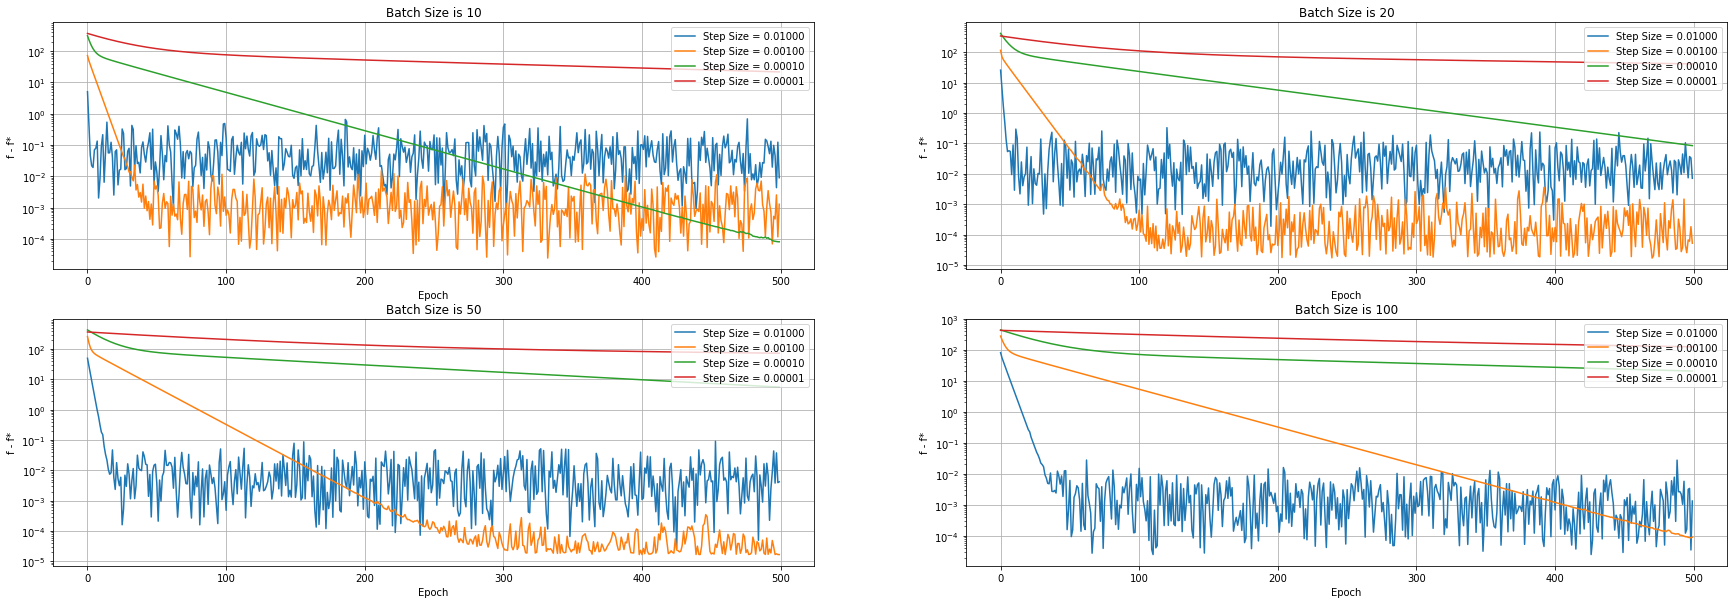

In [ ]:
i = 0
figure1,sub1 = plt.subplots(2, 2)
figure1.set_figwidth(30) 
figure1.set_figheight(10)
for batch_size in np.array([10, 20, 50, 100]):
    if batch_size == 10:
        a = 0 
        b = 0
    elif batch_size == 20:
        a = 0 
        b = 1
    elif batch_size == 50:
        a = 1 
        b = 0
    elif batch_size == 100:
        a = 1 
        b = 1
    sub1[a, b].semilogy( np.arange(n_iter), objective[i,:],label='Step Size = %.5f' %(1e-2))
    sub1[a, b].semilogy( np.arange(n_iter), objective[i+1,:],label='Step Size = %.5f' %(1e-3))
    sub1[a, b].semilogy( np.arange(n_iter), objective[i+2,:],label='Step Size = %.5f' %(1e-4))  
    sub1[a, b].semilogy( np.arange(n_iter), objective[i+3,:],label='Step Size = %.5f' %(1e-5))
    sub1[a,b].grid()
    sub1[a,b].set_xlabel("Epoch")
    sub1[a,b].set_ylabel("f - f*")
    sub1[a,b].set_title("Batch Size is %d" %(batch_size))
    sub1[a,b].legend(loc='upper right')
    i = i + 4

with smaller batch size we can converge sooner but with less accuracy

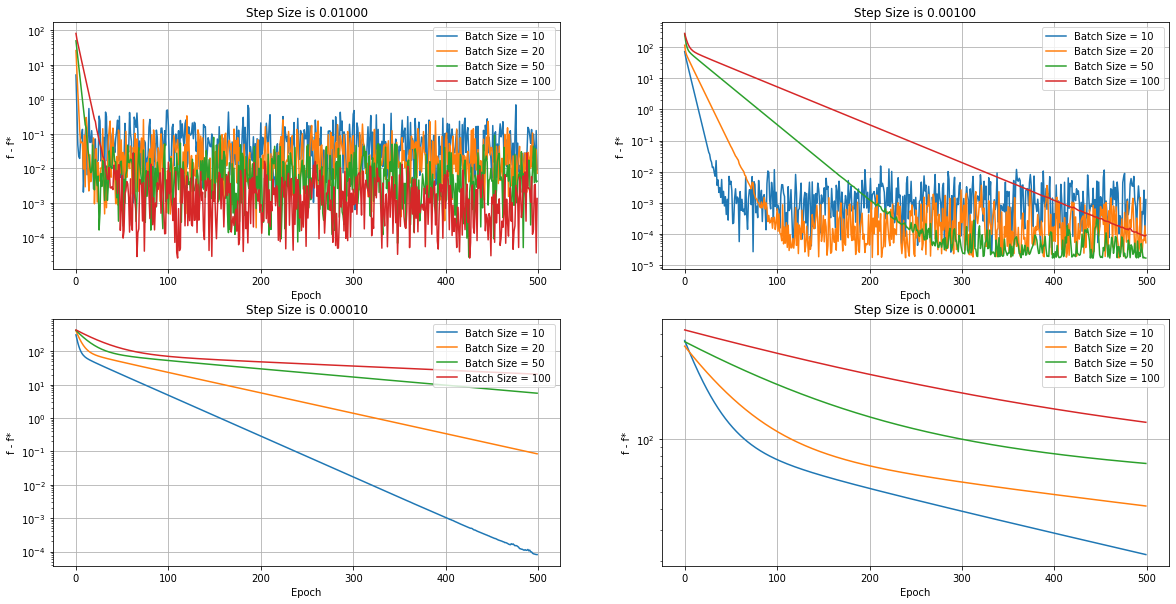

In [ ]:
i = 0
figure2,sub2 = plt.subplots(2, 2)
figure2.set_figwidth(20) 
figure2.set_figheight(10)
for step_size in np.array([1e-2, 1e-3, 1e-4, 1e-5]):
    if step_size == 1e-2:
        a = 0 
        b = 0
    elif step_size == 1e-3:
        a = 0 
        b = 1
    elif step_size == 1e-4:
        a = 1 
        b = 0
    elif step_size == 1e-5:
        a = 1 
        b = 1
    
    sub2[a, b].semilogy( np.arange(n_iter), objective[i, :], label='Batch Size = %d' %(10))
    sub2[a, b].semilogy( np.arange(n_iter), objective[i + 4, :], label='Batch Size = %d' %(20))
    sub2[a, b].semilogy( np.arange(n_iter), objective[i + 8, :], label='Batch Size = %d' %(50))  
    sub2[a, b].semilogy( np.arange(n_iter), objective[i + 12, :], label='Batch Size = %d' %(100))
    sub2[a,b].grid()
    sub2[a, b].set_title("Step Size is %0.5f" %(step_size))
    sub2[a, b].legend(loc='upper right')
    sub2[a, b].set_xlabel("Epoch")
    sub2[a, b].set_ylabel("f - f*")
    i = i + 1

with larger step size , we can converge sooner but with less accuracy

### b


In [ ]:
def proximalGD(x, y, N, landa, t, n_iter, gradient,func, proximal):
    obj = []
    h = np.random.default_rng(seed=10)
    v = h.normal(size=x.shape[1])
   
    for i in np.arange(0, n_iter):
        v_r = v - t * gradient(x, y, v, N)
        v = proximal(v_r,landa,t)
        obj.append(func(x,y,v,N,landa))
    objective1 = np.array(obj)
    return v , objective1

prox = lambda s, landa, t: ( (1 - landa * t * np.sqrt(s.shape[0]) / np.linalg.norm(s)) * s ) if np.linalg.norm(s) >= landa * t * np.sqrt(s.shape[0]) else np.zeros(s.shape[0]) 
proximal=lambda s, landa, t: np.hstack((s[0,0:1], prox(s[0,1:2], landa, t), prox(s[0,2:3], landa, t), prox(s[0,3:8], landa, t), prox(s[0,8:14], landa, t), prox(s[0,14:16], landa, t), prox(s[0,16:17], landa, t), prox(s[0,17:18], landa, t), prox(s[0,18:19], landa, t)))
gradient = lambda x, y, v_o, N: (x @ v_o - y.T) @ x / N 
func = lambda x, y, v_o, N, landa: (1 / (2 * N)) * (np.linalg.norm(x @ v_o - y.T)) ** 2  + landa * (1 * np.linalg.norm(v_o[1]) + 1 * np.linalg.norm(v_o[2]) + np.sqrt(5) * np.linalg.norm(v_o[3:8]) + np.sqrt(5) * np.linalg.norm(v_o[8:14]) + np.sqrt(2) * np.linalg.norm(v_o[14:16]) + 1 * np.linalg.norm(v_o[16]) + 1 * np.linalg.norm(v_o[17]) + 1 * np.linalg.norm(v_o[18]))  
v_o, objective1 = proximalGD(x=X, y=Y, N=X.shape[0], landa=0.02, t=0.005 , n_iter=10000, gradient=gradient, func=func, proximal=proximal)
objective1 = objective1 - 49.9649
print("objective function descending as follows  =",objective1)

objective function descending as follows  = [535.32203785 519.02757143 503.23524251 ...   1.85268689   1.85250634
   1.8523258 ]


The final Vector for Group LASSO =  [ 1.05482511e+01  1.70773273e+01 -1.52765787e+00  2.81524753e-02
 -2.10320490e-01  1.81904007e-02  3.85107073e-02  4.62107540e-02
  5.10867656e-01  4.57512073e-01 -9.97301317e-03  9.19268341e-02
  6.13722660e-01  1.49340878e-01 -2.04253810e-01  5.98219979e-01
  7.90508218e+00 -7.67222567e-01  5.02774781e+00]


'Constant' =  10.548251069701358
'Age' =  17.0773272750587
'Sex' =  -1.5276578677087542
'Jitter' =  [ 0.02815248 -0.21032049  0.0181904   0.03851071  0.04621075]
'Shimmer' =  [ 0.51086766  0.45751207 -0.00997301  0.09192683  0.61372266  0.14934088]
'NHR, HNR' =  [-0.20425381  0.59821998]
'RPDE' =  7.905082178997145
'DFA' =  -0.7672225671722029
'PPE' =  5.027747814767911


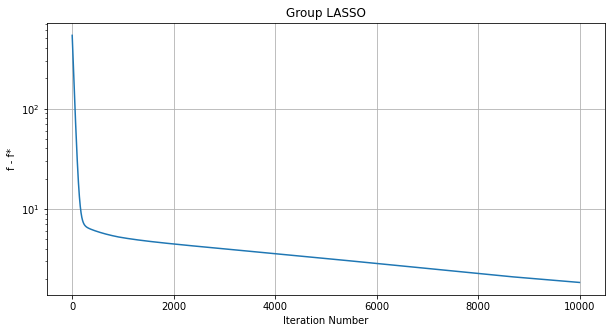

In [ ]:
iter = 1e4
fig1 = plt.figure()
fig1.set_figwidth(10) 
fig1.set_figheight(5)
plt.semilogy(np.arange(iter),objective1)
plt.grid()
plt.title("Group LASSO")
plt.xlabel("Iteration Number")
plt.ylabel("f - f*")
print("The final Vector for Group LASSO = ",v_o)
print("\n")
print("'Constant' = " , v_o[0])
print("'Age' = ", v_o[1])
print("'Sex' = ", v_o[2])
print("'Jitter' = ", v_o[3:8])
print("'Shimmer' = ", v_o[8:14])
print("'NHR, HNR' = ", v_o[14:16])
print("'RPDE' = ", v_o[16])
print("'DFA' = ", v_o[17])
print("'PPE' = ", v_o[18])

Text(0, 0.5, 'f - f*')

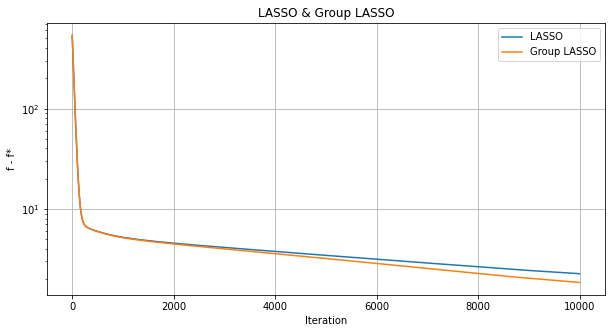

In [ ]:
iter = 1e4
proximal_lasso =lambda u, landa, t: np.hstack((u[0,0:1], prox(u[0,1:19], landa, t)))
vector_normal, objective2 = proximalGD(x=X, y=Y, N=X.shape[0], landa=0.02, t=0.005,n_iter=10000, gradient=gradient, func=func, proximal = proximal_lasso)
objective2 = objective2 - 49.9649
fig = plt.figure()
fig.set_figwidth(10) 
fig.set_figheight(5)
plt.semilogy(np.arange(iter),objective2)
plt.semilogy(np.arange(iter),objective1)
plt.legend(["LASSO", "Group LASSO"])
plt.grid()
plt.title("LASSO & Group LASSO")
plt.xlabel("Iteration")
plt.ylabel("f - f*")

In [ ]:
def accproximalGD(x, y, N, landa , t, n_iter, gradient,func, proximal):
    obj = []
    h = np.random.default_rng(seed=10)
    v_p = h.normal(size=x.shape[1])
    v_n = h.normal(size=x.shape[1])
    for i in np.arange(0, n_iter):
        C_t = (i-1) / (i+2)
        v = v_n + C_t * (v_n - v_p)
        v_p = v_n
        grad = gradient(x, y, v, N)
        v__prime = v - t * grad
        v_n = proximal(v__prime, landa, t)
        v_n[0] = v_p[0] - t * grad[0,0]
        obj.append(func(x, y, v_n, N, landa))

    objective3 = np.array(obj)
    return v_n , objective3

v_acc, objective_acc = accproximalGD(x=X, y=Y, N=X.shape[0], landa=0.02, t=0.005,n_iter=10000, gradient=gradient, func=func, proximal=proximal)
objective_acc = objective_acc - 49.9649



The final Vector for Group LASSO using accProximalGD = [ 5.94689865e+00  3.13507896e+01 -1.44075854e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.32651484e-03 -2.58497587e-03 -2.64684852e-03 -2.72846559e-03
 -1.25215605e-04 -2.64660988e-03  0.00000000e+00  0.00000000e+00
  9.27748471e+00 -1.07615010e+01  8.20541505e+00]


'Constant' =  5.946898647001754
'Age' =  31.350789573505686
'Sex' =  -1.4407585422502651
'Jitter' =  [0. 0. 0. 0. 0.]
'Shimmer' =  [-0.00232651 -0.00258498 -0.00264685 -0.00272847 -0.00012522 -0.00264661]
'NHR, HNR' =  [0. 0.]
'RPDE' =  9.277484712500774
'DFA' =  -10.761500964393248
'PPE' =  8.205415054973276


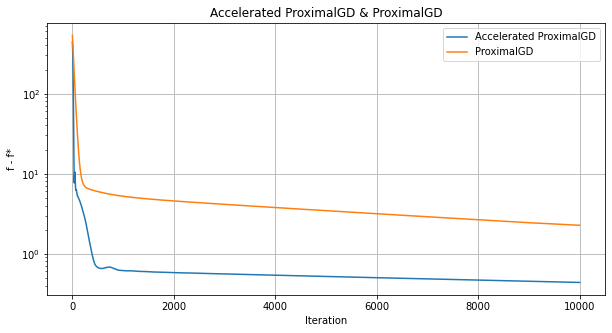

In [ ]:
iter = 1e4
fig = plt.figure()
fig.set_figwidth(10) 
fig.set_figheight(5)
plt.semilogy(np.arange(iter),objective_acc)
plt.semilogy(np.arange(iter),objective2)
plt.legend(["Accelerated ProximalGD", "ProximalGD"])
plt.grid()
plt.title("Accelerated ProximalGD & ProximalGD")
plt.ylabel("f - f*")
plt.xlabel("Iteration")

print("The final Vector for Group LASSO using accProximalGD =" ,  v_acc)
print("\n")
print("'Constant' = " , v_acc[0])
print("'Age' = ", v_acc[1])
print("'Sex' = ", v_acc[2])
print("'Jitter' = ", v_acc[3:8])
print("'Shimmer' = ", v_acc[8:14])
print("'NHR, HNR' = ", v_acc[14:16])
print("'RPDE' = ", v_acc[16])
print("'DFA' = ", v_acc[17])
print("'PPE' = ", v_acc[18])

as we can see , AccproximalGD has much better performance , more accurate on same itteration